In [6]:
from src.LogNegManager import LogNegManager

In [7]:
generalOptions = {
    "numModes": 128,
    "plots_directory": "./plots/128-plots/",
    "data_directory": "./data/128-data/",
    "parallelize": True
  }

transformationMatrixOptions = {
    "DataDirectory": "./sims-128/",
    "InstantToPlot": 15
  }

initialStates = [
      {"Temperature":  0.0,
      "OneModeSqueezing": 0.0,
        "TwoModeSqueezing": 0.0}
    ]

measurements = [
    {"type": "sameParity",
      "modesToApply": [3],
    "typeOfState":  1}
  ]

In [8]:
LNManager = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions,
                          initialStates=initialStates)

In [9]:
dict_to_plot = {}
for measurement in measurements:
    if measurement["typeOfState"] == 0:
        dict_to_plot = LNManager.measureInitialStatesEntanglement(measurement["type"], measurement.get("modesToApply", None))
    else:
        dict_to_plot = LNManager.measureFinalStatesEntanglement(measurement["type"], measurement.get("modesToApply", None))

ValueError: x and y must have same first dimension, but have shapes (1,) and (128,)

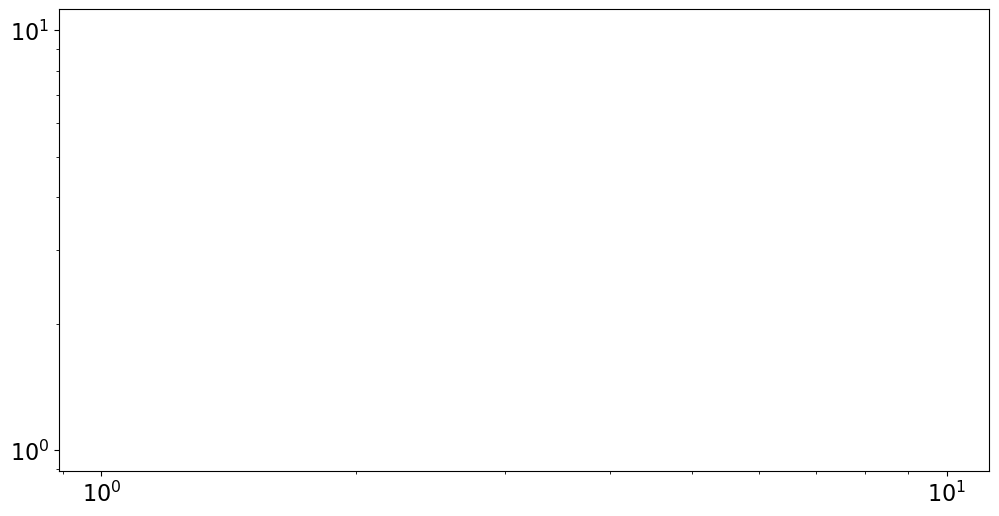

In [10]:
LNManager.plotResults(dict_to_plot)